In [70]:
# %matplotlib inline
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools
from itertools import starmap

In [111]:
# img_path = 'data/processed/VP_Img_resize/807/6.jpg'
img_path = 'data/processed/VP_Img_resize/9650/6.jpg'
img = imageio.imread(img_path)

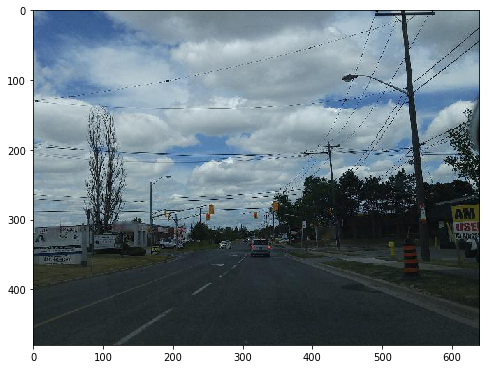

In [112]:
plt.figure(figsize=(8,8))
plt.imshow(img)

In [113]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((15, 15), np.uint8)
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)  # Open (erode, then dilate)
edges = cv2.Canny(opening, 40, 150, apertureSize=3)  # Canny edge detection
# lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)  # Hough line detection

In [114]:
def endpoints(rho, theta):
    a = np.cos(theta)
    b = np.sin(theta)
    x_0 = a * rho
    y_0 = b * rho
    x_1 = int(x_0 + 1000 * (-b))
    y_1 = int(y_0 + 1000 * (a))
    x_2 = int(x_0 - 1000 * (-b))
    y_2 = int(y_0 - 1000 * (a))

    return ((x_1, y_1), (x_2, y_2))

In [115]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)  # Hough line detection
hough_lines = []
if lines is not None:
    for line in lines:
        hough_lines.extend(list(starmap(endpoints, line)))

In [116]:
len(hough_lines)

37

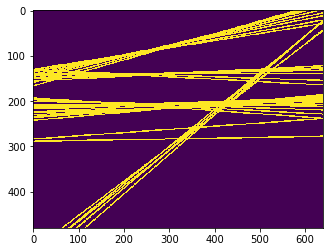

In [117]:
# img_copy = img.copy()
img_copy = np.zeros(img.shape[:2])
# line = hough_lines[-1]
for line in hough_lines:
    cv2.line(img_copy, line[0], line[1], (255), 2)
plt.imshow(img_copy)

In [121]:
img_copy[:,:,None].shape

(480, 640, 1)

In [122]:
np.concatenate([img, img_copy[:,:,None]], -1).shape

(480, 640, 4)

In [78]:
hough_lines

[((-1010, -68), (938, 381)),
 ((-1013, -41), (942, 374)),
 ((-1003, 209), (995, 244)),
 ((-1015, -16), (947, 365)),
 ((-832, 622), (1034, -94)),
 ((-1016, 8), (952, 355)),
 ((-981, 295), (1013, 155)),
 ((-1013, -28), (950, 352)),
 ((-1006, -96), (934, 387)),
 ((-996, 217), (1003, 182)),
 ((-1014, 127), (977, 301)),
 ((-1015, 0), (954, 347)),
 ((-1013, -39), (942, 376)),
 ((-853, 593), (1037, -57)),
 ((-966, 518), (1028, 379)),
 ((-1016, 100), (972, 309)),
 ((-1001, 70), (998, 105)),
 ((-984, 469), (1014, 399)),
 ((-1016, 25), (958, 338)),
 ((-1012, 146), (982, 286)),
 ((-1016, 75), (968, 319)),
 ((-879, 544), (1033, -39)),
 ((-1010, 171), (986, 276)),
 ((-1012, 95), (980, 269))]

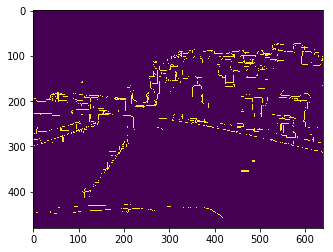

In [55]:
plt.imshow(edges)

In [96]:
edges.max()

255